## Lending Club Case Study

### Problem Statement


### Business Understanding

You work for a consumer finance company that specializes in lending various types of loans to urban customers. When the company receives a loan application, it must make a decision on whether to approve or deny the loan based on the applicant’s profile. There are two main risks associated with the bank's decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
2. If the applicant is not likely to repay the loan, i.e. is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


## 1) Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## 2) Loading the data

In [2]:
# Loading the csv into dataframe

df=pd.read_csv("loan.csv",low_memory=False)

## 3) Data Inespection

In [3]:
# Checking the shape of dataframe

df.shape

(39717, 111)

In [4]:
# checking if there is any header, that needs to cleaned

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# checking if there is any footer that needs to be cleaned

df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# getting the info aboout df & the column dtypes

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [7]:
# finding the percentage of missing values in each column

PercMis = df.isna().mean()*100
PercMis.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

## 4) Data Cleaning - missing values, checking for inconsistencies, oulier treatment

In [8]:
# its drops the columns with more than 50% of the null values, Since they cannot help in analysis

df1 = df.dropna(axis=1, thresh=0.5*len(df))

In [9]:
# Rechecking for the null values in the data frame

(df1.isna().mean()*100).sort_values(ascending=False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


In [10]:
# getting Statical insight of the numeric columns

df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
# getting Insights of the objects columns

df1.describe(include='O')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717,39667,39717,39646,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,26526,14,19615,823,50,526,1089,1,101,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,210,18641,2184,597,7099,370,977,39717,1256,10308,39717


### 4.1) Checking for the unique values in each of the column

In [12]:
# getting the number of unique values in each columns
# we can observe that there are some columns with only 1 unique values & these columns don't help in our analysis
# we can observe that there are some columns with only all unique values & some of these columns dont help in our analysis

df1.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [13]:
# listing down the columns where the column has only 1 unique value (all the values in the column are same)

OneUniCol = [col for col in df1.columns if df1[col].nunique()==1]
OneUniCol

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
# listing down the columns where the column has number of unique value more than 15000

dropcol = [col for col in df1.columns if df1[col].nunique()>15000]
dropcol

['id',
 'member_id',
 'installment',
 'emp_title',
 'url',
 'desc',
 'title',
 'revol_bal',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'last_pymnt_amnt']

### 4.2) Droping all columns with no unique values & some non numeric columns with unique values >15000

In [15]:
# droping columns with have same values
# droping some of the columns where the number of unique values is > 15000 & These column dont help in analysis

df1=df1.drop(OneUniCol, axis=1)
df1=df1.drop(['member_id', 'url', 'desc', 'title','emp_title'], axis=1)

In [16]:
# Now lets see the dataframe once again & lets see if we can drop few columns that dont help in analysis

df1.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [17]:
# Lets drop some columns which are not required for the analysis.
# we come up with these list by analysing data dictonary & the columns of data frame

drpcol = ['sub_grade','zip_code','inq_last_6mths','open_acc','last_pymnt_d','earliest_cr_line','last_pymnt_amnt',
          'last_credit_pull_d','out_prncp','out_prncp_inv','earliest_cr_line','last_credit_pull_d','delinq_2yrs','revol_util',
          'total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','revol_bal',
          'total_rec_int','recoveries','funded_amnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']

df1=df1.drop(drpcol, axis=1)

In [18]:
(df1.isna().mean()*100).sort_values(ascending=False)

emp_length              2.706650
pub_rec_bankruptcies    1.754916
verification_status     0.000000
total_acc               0.000000
pub_rec                 0.000000
dti                     0.000000
addr_state              0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
id                      0.000000
loan_amnt               0.000000
home_ownership          0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt             0.000000
annual_inc              0.000000
dtype: float64

In [19]:
# We have fixed most of the columns & we can see it from above output
# lets drop the rows where we have null values in paticular columns, so that we have no null values in our dataframe

df1=df1.dropna(subset=['pub_rec_bankruptcies','emp_length'])

### 4.3) Getting the values in right format for the columns

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37945 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37945 non-null  int64  
 1   loan_amnt             37945 non-null  int64  
 2   funded_amnt           37945 non-null  int64  
 3   term                  37945 non-null  object 
 4   int_rate              37945 non-null  object 
 5   installment           37945 non-null  float64
 6   grade                 37945 non-null  object 
 7   emp_length            37945 non-null  object 
 8   home_ownership        37945 non-null  object 
 9   annual_inc            37945 non-null  float64
 10  verification_status   37945 non-null  object 
 11  issue_d               37945 non-null  object 
 12  loan_status           37945 non-null  object 
 13  purpose               37945 non-null  object 
 14  addr_state            37945 non-null  object 
 15  dti                   37

In [21]:
df1.emp_length.value_counts().head()

emp_length
10+ years    8760
< 1 year     4416
2 years      4304
3 years      4034
4 years      3391
Name: count, dtype: int64

In [22]:
# Function to clean emp_length column & get the value in int format

def clean_emp_len(x):
    x=str(x)
    x=x.replace('years','')
    x=x.replace('year','')
    x=x.replace(' ','')
    x=x.replace('+','')
    x=x.replace('<','')
    return int(x)

In [23]:
df1['num_emp_len']=df1.emp_length.apply(clean_emp_len)
df1.num_emp_len.value_counts().head()

num_emp_len
10    8760
1     7564
2     4304
3     4034
4     3391
Name: count, dtype: int64

In [24]:
df1.term.value_counts().head()

term
36 months    27590
60 months    10355
Name: count, dtype: int64

In [25]:
# Removning months for term columns & converting it to int

df1.term = df1.term.apply(lambda x: int(x.replace('months','')))
df1.term.value_counts().head()

term
36    27590
60    10355
Name: count, dtype: int64

In [26]:
df1.int_rate.value_counts().head()

int_rate
10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
Name: count, dtype: int64

In [27]:
# Removning % for int_-rate columns & converting it to float

df1.int_rate = df1.int_rate.apply(lambda x: float(x.replace('%','')))
df1.int_rate.value_counts().head()

int_rate
10.99    932
13.49    813
11.49    800
7.51     756
7.88     701
Name: count, dtype: int64

In [28]:
df1.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [29]:
# Converting the issue_d into datatime format

df1.issue_d=pd.to_datetime(df1.issue_d, format='%b-%y')
df1.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [30]:
# converting the few columns of int to float

fltCol = ['loan_amnt', 'funded_amnt', 'int_rate','installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies']

df1.loc[:,fltCol]=df1.loc[:,fltCol].astype(float).apply(lambda x: round(x,2))

In [31]:
# one final check before we proceed further

df1.isna().mean()*100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec                 0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
num_emp_len             0.0
dtype: float64

## 5) Outliers Treatment & Deriving new variables/columns

In [32]:
# Creating a year column form the issue_d column

df1['year']=df1.issue_d.dt.year
df1.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int32

In [33]:
# Creating a month column form the issue_d column

df1['month']=df1.issue_d.dt.month
df1.month.head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int32

In [34]:
# Creating a new dataframe which does not consists rows where loan_status is Current

df2=df1.loc[df1['loan_status'] != 'Current']

### 5.1) Outlier Treatment

In [35]:
df2.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,num_emp_len,year,month
0,1077501,5000,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,9,0.0,10,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,4,0.0,1,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,10,0.0,10,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,37,0.0,10,2011,12
5,1075269,5000,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,12,0.0,3,2011,12


<Axes: ylabel='loan_amnt'>

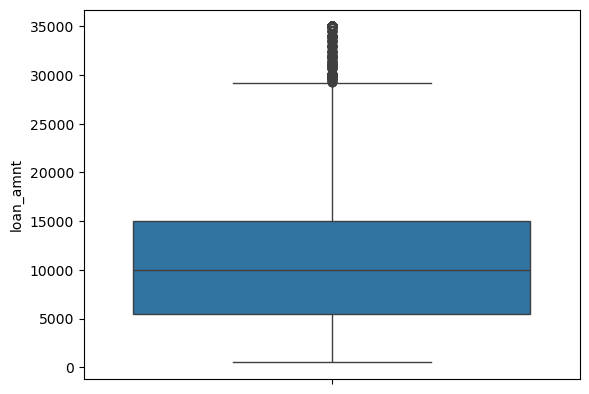

In [36]:
# There are few outliers but they are very close the maximum value(upper whisker), hence we can ignore it

sns.boxplot(data=df2, y='loan_amnt')

<Axes: ylabel='int_rate'>

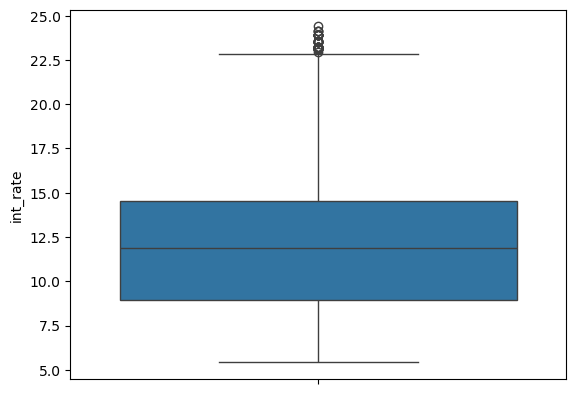

In [37]:
# There are few outliers but they are very close the maximum value(upper whisker), hence we can ignore it

sns.boxplot(data=df2, y='int_rate')

<Axes: ylabel='annual_inc'>

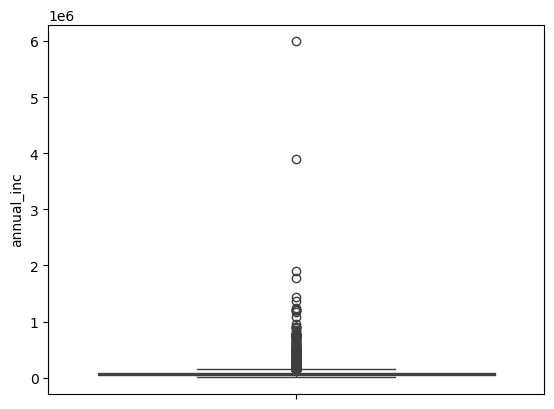

In [38]:
# we can see many outliers in this case & we need to remove them in order to get better results

sns.boxplot(data=df2, y='annual_inc')

<Axes: ylabel='dti'>

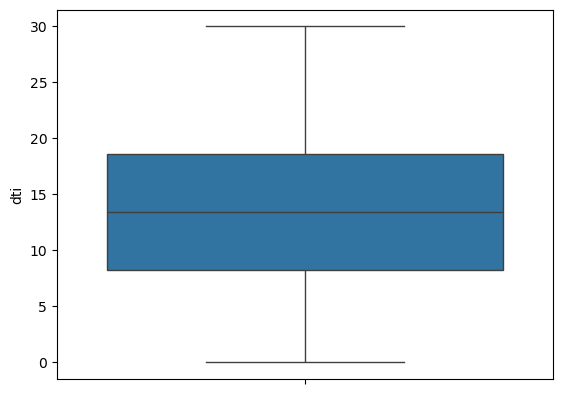

In [39]:
# There are no outliers

sns.boxplot(data=df2, y='dti')

<Axes: ylabel='installment'>

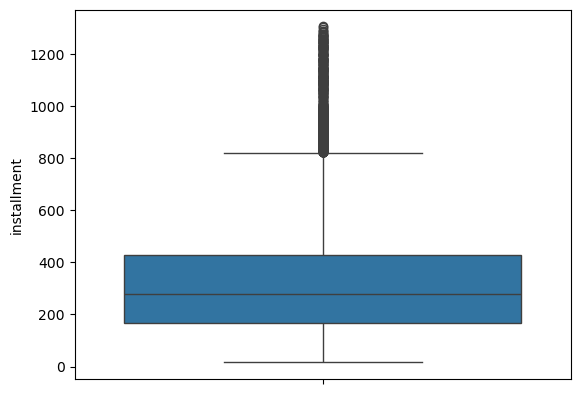

In [40]:
# There are outlier & we need to remove these

sns.boxplot(data=df2, y='installment')

In [41]:
# function to cap the outliers

def Cap_Outlier(data, cols):
    for col in cols:
        q1 = data[col].quantile(.25)
        q3 = data[col].quantile(.75)
        iqr = q3-q1
        low = q1-(1.5*iqr)
        high = q3+(1.5*iqr)
        data.loc[data[col]<= low, col] = low
        data.loc[data[col]>= high, col] = high
    return data

df2=Cap_Outlier(df2, ['annual_inc','installment'])

<Axes: ylabel='installment'>

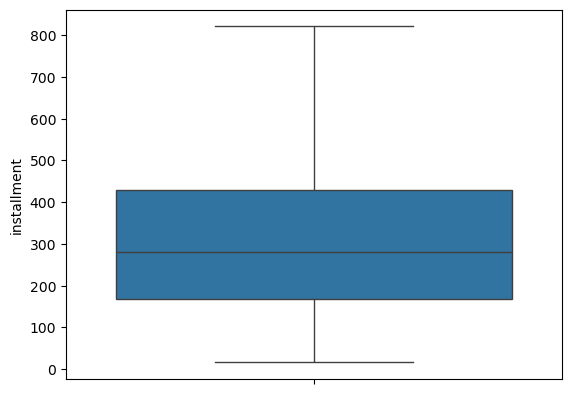

In [42]:
# Hence Outliers for installments column is caped

sns.boxplot(data=df2, y='installment')

<Axes: ylabel='annual_inc'>

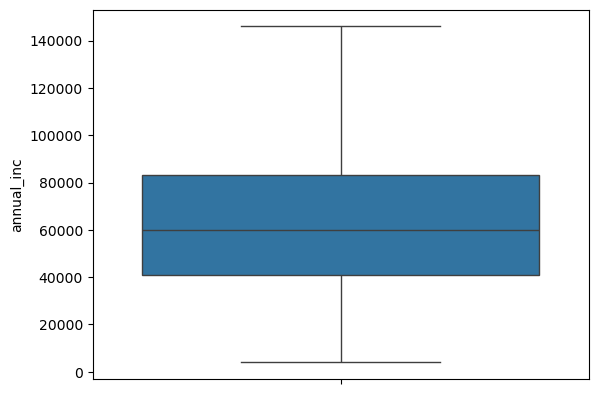

In [43]:
# Hence Outliers for Annual Income column is caped

sns.boxplot(data=df2, y='annual_inc')

In [44]:
df2.annual_inc.describe()

count     36847.000000
mean      65723.542688
std       32683.045046
min        4000.000000
25%       41004.000000
50%       60000.000000
75%       83000.000000
max      145994.000000
Name: annual_inc, dtype: float64

### 5.2) Creating a new column income bucket

In [45]:
# lets make income buckets which can be used for future analysis

def inc_bucket(x):
    if x > 1250000:
        return ">125k"
    elif x > 100000:
        return ">100k"
    elif x > 75000:
        return ">75k"
    elif x > 50000:
        return ">50k"
    elif x > 25000:
        return ">25k"
    else:
        return "<25k"

df2['inc_band']=df2.annual_inc.apply(inc_bucket)

C:\Users\Sunny\AppData\Local\Temp\ipykernel_3160\736240932.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['inc_band']=df2.annual_inc.apply(inc_bucket)


In [46]:
# Creating a new column Charged, it is used in heat map

df2['Charged']=df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

C:\Users\Sunny\AppData\Local\Temp\ipykernel_3160\328919194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Charged']=df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)


## 6) Univariate analysis

In [47]:
Char_df = df2[df2['loan_status']=="Charged Off"]
Paid_df = df2[df2['loan_status']=="Fully Paid"]

[Text(0, 0, '85.7'), Text(0, 0, '14.3')]

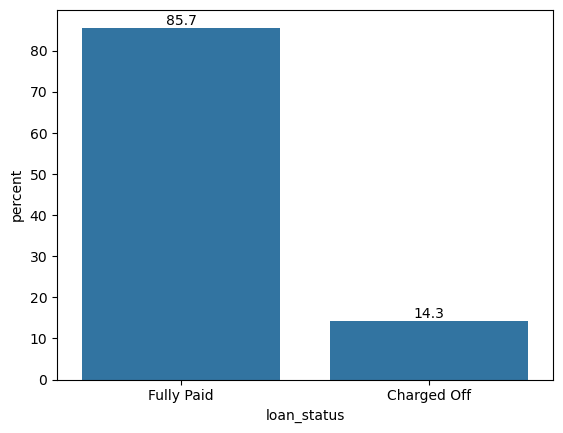

In [48]:
ax=sns.countplot(data=df2, x='loan_status', stat='percent')

ax.bar_label(ax.containers[0],fmt='%.1f')

# almost 15% of the total loans are charged off.

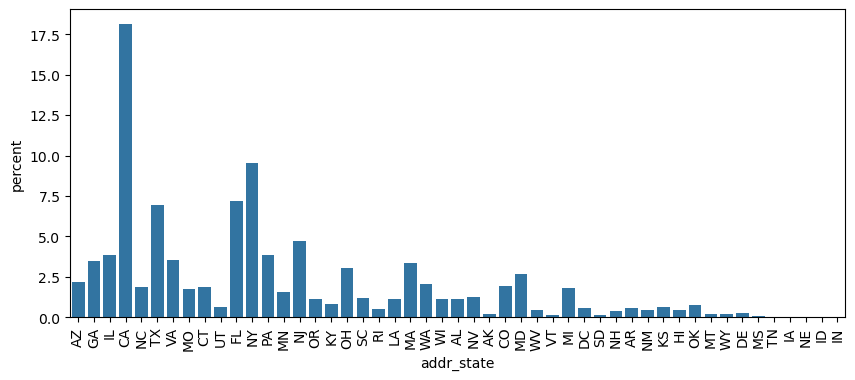

In [49]:
# Percentage of Loan per state

plt.figure(figsize=(10,4))
ax=sns.countplot(data=df2, x='addr_state', stat='percent')
plt.xticks(rotation=90)
plt.show()

# Across all the states the Percentage of loan is distributed is in the order CA > NY > FL

[Text(0, 0, '31.9'), Text(0, 0, '25.8'), Text(0, 0, '42.3')]

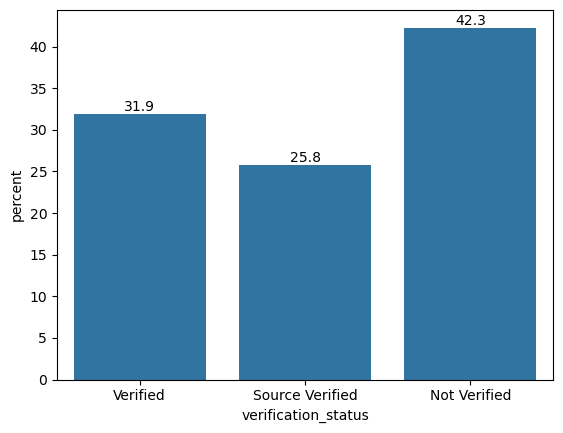

In [50]:
# Percent of loan per status

ax=sns.countplot(data=df2, x='verification_status', stat='percent')
ax.bar_label(ax.containers[0], fmt='%.1f')
    
# 42.3% of the loan is given to Not verified persons
# 31.9% of the loan is given to verified persons

[Text(0, 0, '48.0'), Text(0, 0, '7.3'), Text(0, 0, '44.4'), Text(0, 0, '0.3')]

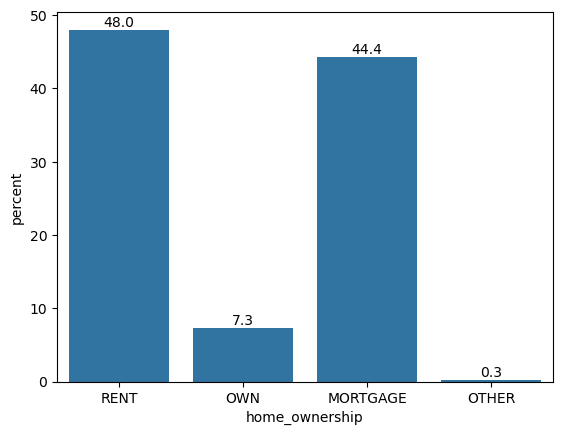

In [51]:
# Percent of loan per Home Ownership

ax=sns.countplot(data=df2, x='home_ownership', stat='percent')
ax.bar_label(ax.containers[0],fmt='%.1f')

# Most of the loan is given to customers with rented house followed by Mortgage house

[Text(0, 0, '25.8'),
 Text(0, 0, '30.3'),
 Text(0, 0, '20.3'),
 Text(0, 0, '13.2'),
 Text(0, 0, '7.0'),
 Text(0, 0, '2.6'),
 Text(0, 0, '0.8')]

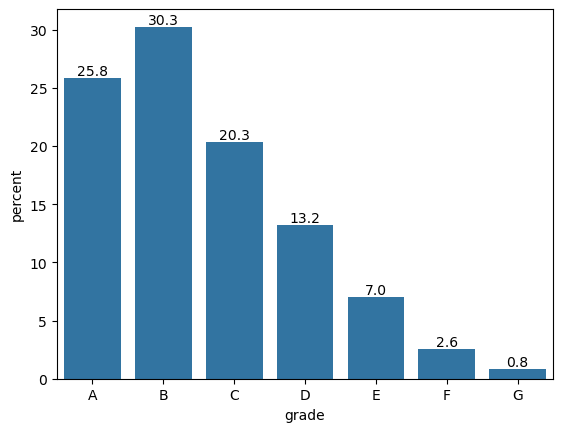

In [52]:
ax=sns.countplot(data=df2, x='grade', stat='percent', order=['A','B','C','D','E','F','G'])
ax.bar_label(ax.containers[0], fmt='%.1f')

# About 30.2% of loan fall under grade B
# About 25.8% of loan fall under grade A

[Text(0, 0, '13.0'),
 Text(0, 0, '3.9'),
 Text(0, 0, '4.5'),
 Text(0, 0, '9.8'),
 Text(0, 0, '2.4'),
 Text(0, 0, '47.2'),
 Text(0, 0, '7.4'),
 Text(0, 0, '5.6'),
 Text(0, 0, '1.8'),
 Text(0, 0, '1.5'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.8')]

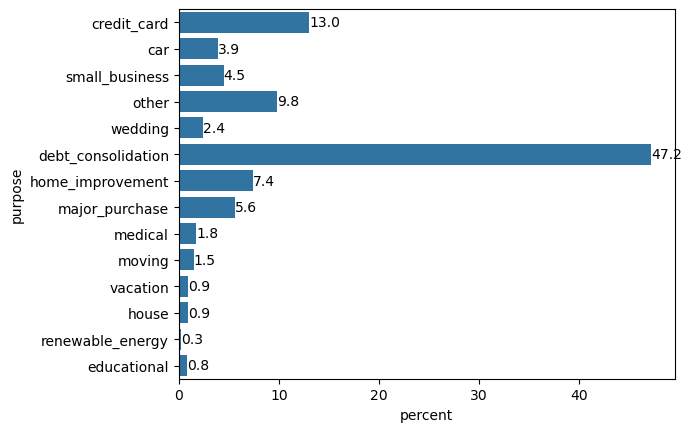

In [53]:
ax=sns.countplot(data=df2, y='purpose', stat='percent')
ax.bar_label(ax.containers[0], fmt='%.1f')

# About 47.1% of loan is for Dept Consolidation
# About 13.0% of loan is for Credit card

[Text(0, 0, '20.1'),
 Text(0, 0, '11.4'),
 Text(0, 0, '10.7'),
 Text(0, 0, '8.9'),
 Text(0, 0, '8.6'),
 Text(0, 0, '5.8'),
 Text(0, 0, '4.6'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.3'),
 Text(0, 0, '22.7')]

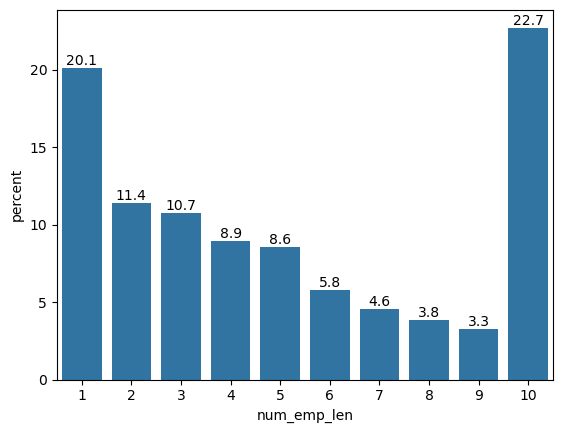

In [90]:
ax=sns.countplot(data=df2, x='num_emp_len', stat='percent')
ax.bar_label(ax.containers[0],fmt='%.1f')

# about 22.7% of the loan is given to emplyee with more than 10+ years of experince

<Axes: ylabel='annual_inc'>

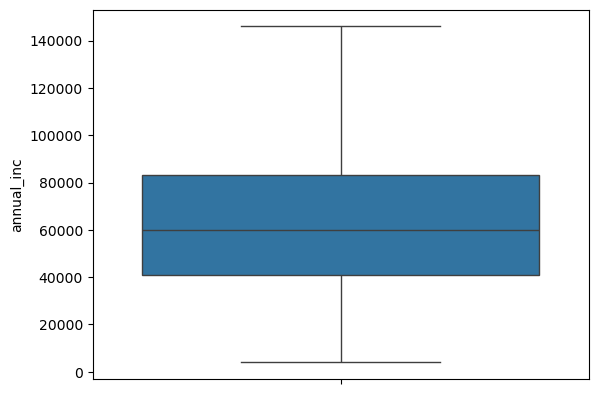

In [55]:
# Annual income of customer

sns.boxplot(data=df2, y='annual_inc')

# about 50% of the customers have income between 41000 to 83000 (IQR)
# about 50% of the customers have income less than 60000 (median)

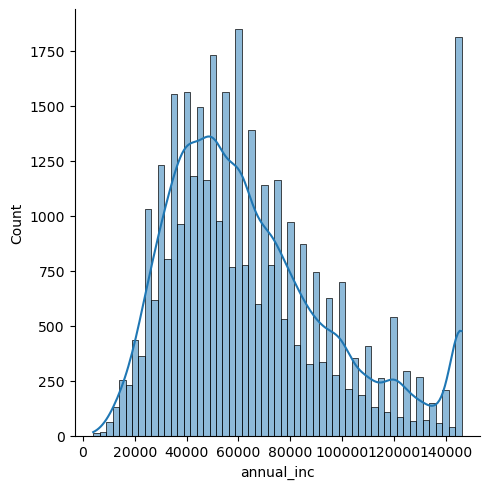

In [56]:
sns.displot(data=df2, x='annual_inc', kde='True')

# the mode value of income is 60000
# we can see count increasing at the end because we have capped the outliers

<Axes: ylabel='int_rate'>

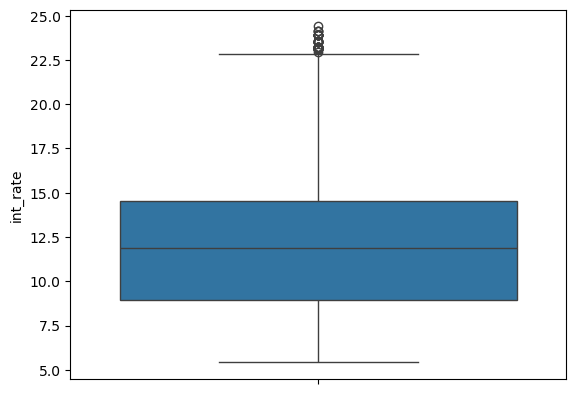

In [57]:
# Intrest rate of the loan

sns.boxplot(data=df2, y='int_rate')

# about 50% of the loan have intrest rate between 8.9% to 14.5% (IQR)
# about 50% of the customers have intrest rate less than 11.8% (median)

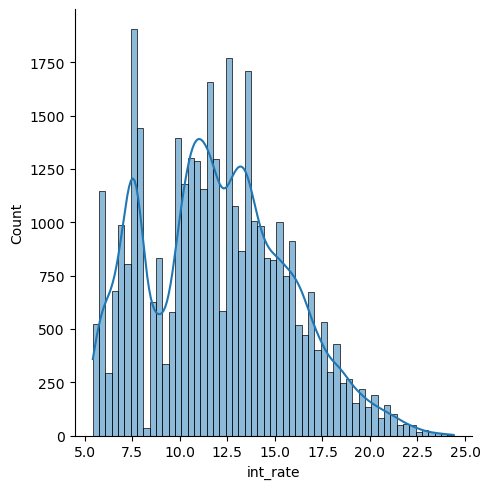

In [58]:
sns.displot(data=df2, x='int_rate', kde='True')

# most of the loan are given at intrest rate of 7.5%

## 7) Bi-Variate Analysis

#### 7.1)Percentage of Loan per state


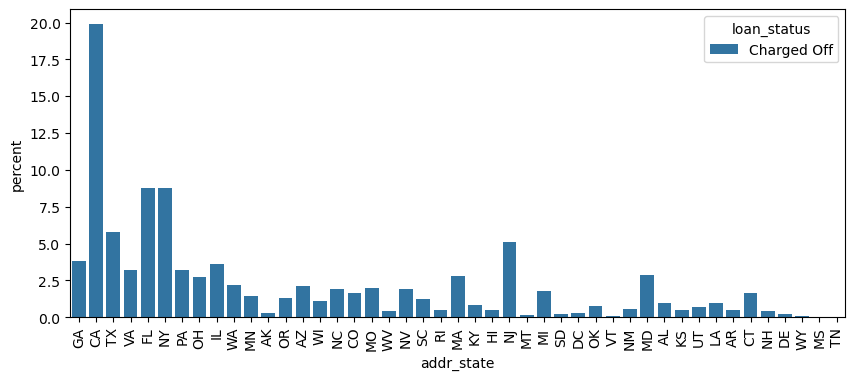

In [59]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=Char_df, x='addr_state', stat='percent', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

# Across all the states the Percentage of loan going to charged off is in the order of CA > FL > NY

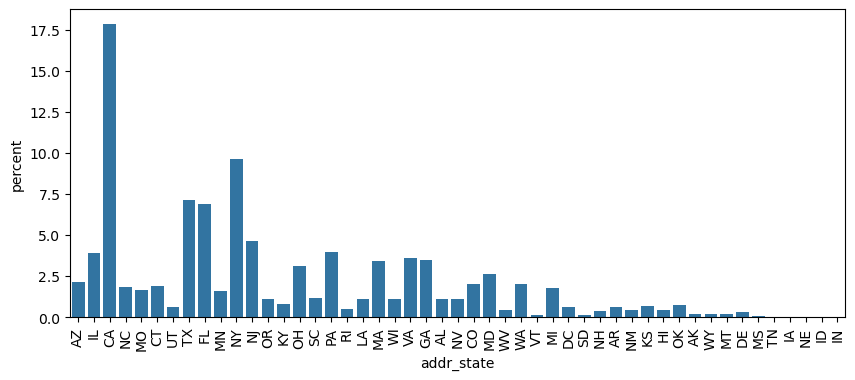

In [60]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=Paid_df, x='addr_state', stat='percent')
plt.xticks(rotation=90)
plt.show()

# Across all the states the Percentage of loan going to Fully paid is in the order of CA > NJ > TX

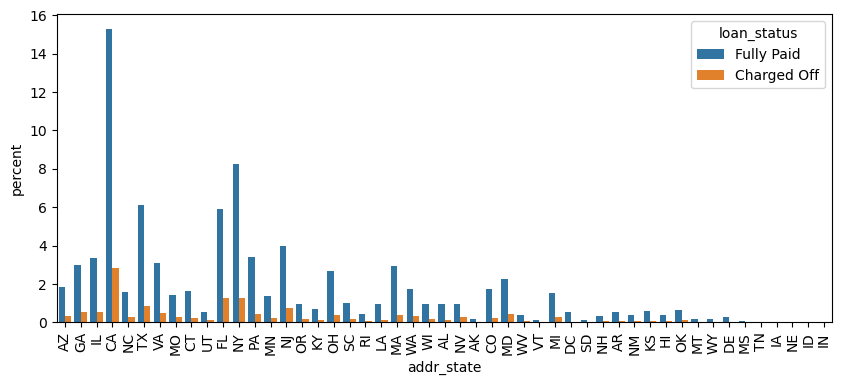

In [61]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df2, x='addr_state', stat='percent', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#### 7.2) Percent of loan per verification status

[Text(0, 0, '26.4'), Text(0, 0, '37.0'), Text(0, 0, '36.6')]

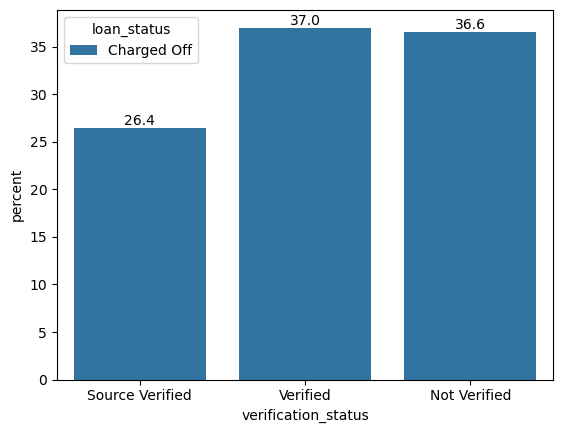

In [62]:
ax=sns.countplot(data=Char_df, x='verification_status', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0], fmt='%.1f')
    
# 37% of the loan is given to verified persons & its Charged off
# 36.6% of the loan is given to not-verified persons & its Charged off
# Most of the Loan given to verified & not-verified persons but its being Charged off

[Text(0, 0, '31.1'), Text(0, 0, '43.2'), Text(0, 0, '25.7')]

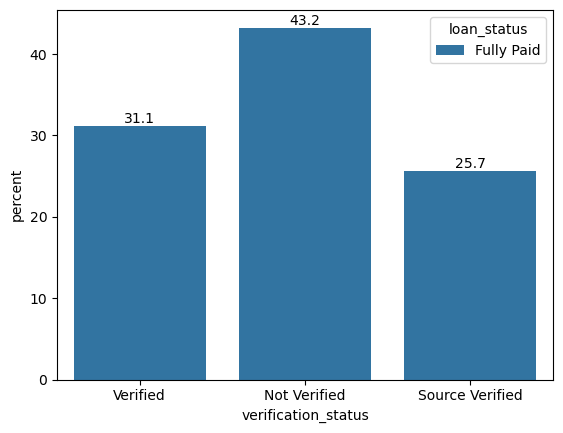

In [63]:
ax=sns.countplot(data=Paid_df, x='verification_status', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0],fmt='%.1f')

# 43.2% of the loan is given to not verified persons & Paid fully
# 31.1% of the loan is given to verified persons & Paid fully
# Most of the Loan given to verified & not-verified persons is Paid fully

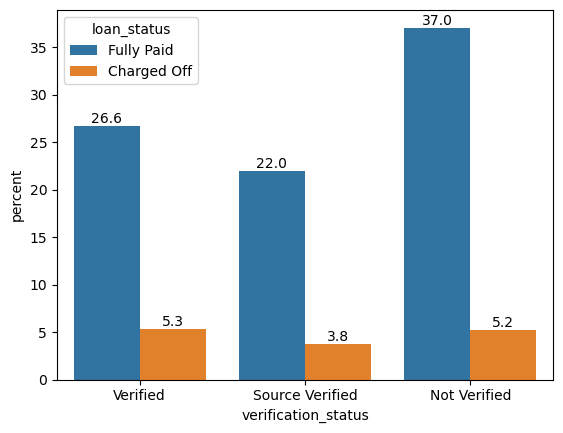

In [64]:
ax=sns.countplot(data=df2, x='verification_status', stat='percent', hue='loan_status')
for i in range(2):
    ax.bar_label(ax.containers[i], fmt='%.1f')

# 43.2% of the loan is given to not verified persons & Paid fully
# 31.1% of the loan is given to verified persons & Paid fully
# Most of the Loan given to verified & not-verified persons is Paid fully

#### 7.3) Percent of loan per Home Ownership

[Text(0, 0, '50.7'), Text(0, 0, '7.3'), Text(0, 0, '41.6'), Text(0, 0, '0.3')]

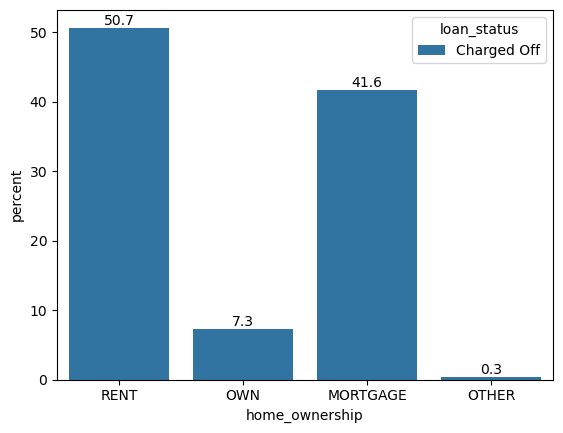

In [65]:
ax=sns.countplot(data=Char_df, x='home_ownership', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0], fmt='%.1f')

# Customers having Rented house are having the highest charged off

[Text(0, 0, '47.6'), Text(0, 0, '7.4'), Text(0, 0, '44.8'), Text(0, 0, '0.3')]

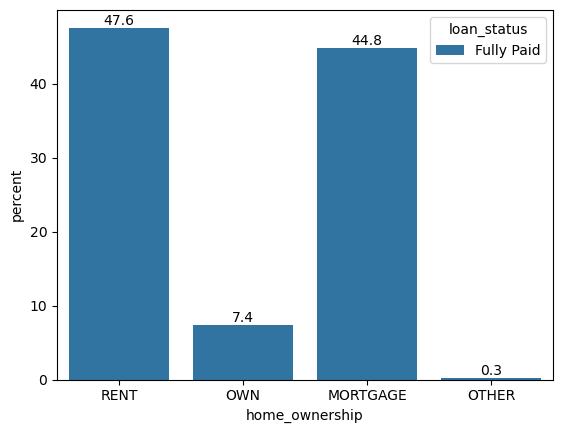

In [66]:
ax=sns.countplot(data=Paid_df, x='home_ownership', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0], fmt='%.1f')

# Customers having Rented house are having the highest fully Paid the loan

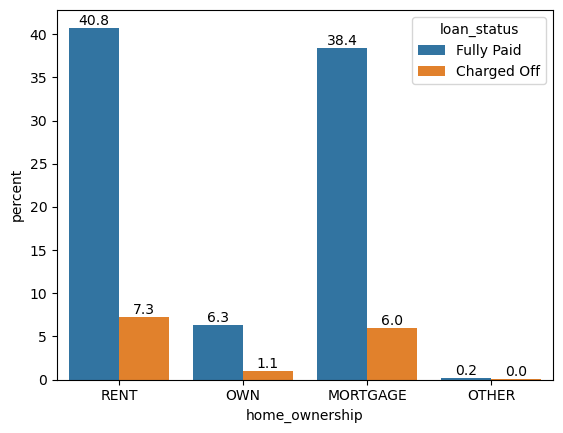

In [67]:
ax=sns.countplot(data=df2, x='home_ownership', stat='percent', hue='loan_status')
for i in range(2):
    ax.bar_label(ax.containers[i],fmt='%.1f')

# Customers having Rented house are having the highest fully Paid the loan

#### 7.4) Percent of loan as per grade

[Text(0, 0, '10.5'),
 Text(0, 0, '25.1'),
 Text(0, 0, '23.7'),
 Text(0, 0, '19.9'),
 Text(0, 0, '13.1'),
 Text(0, 0, '5.8'),
 Text(0, 0, '1.9')]

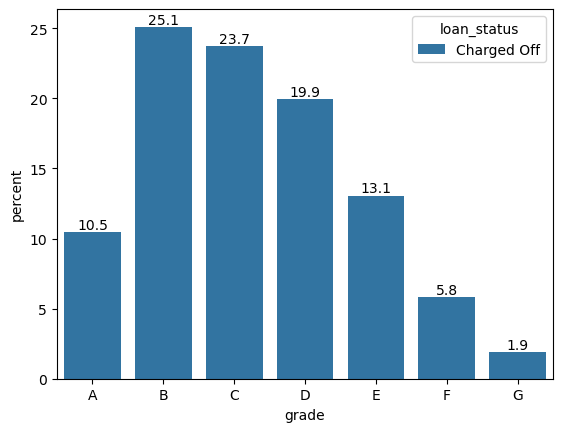

In [68]:
ax=sns.countplot(data=Char_df,x='grade',hue='loan_status', stat='percent', order=['A','B','C','D','E','F','G'])
ax.bar_label(ax.containers[0],fmt='%.1f')

# Loan grade B & C are having high chance of being Charged off

[Text(0, 0, '28.4'),
 Text(0, 0, '31.1'),
 Text(0, 0, '19.7'),
 Text(0, 0, '12.1'),
 Text(0, 0, '6.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '0.6')]

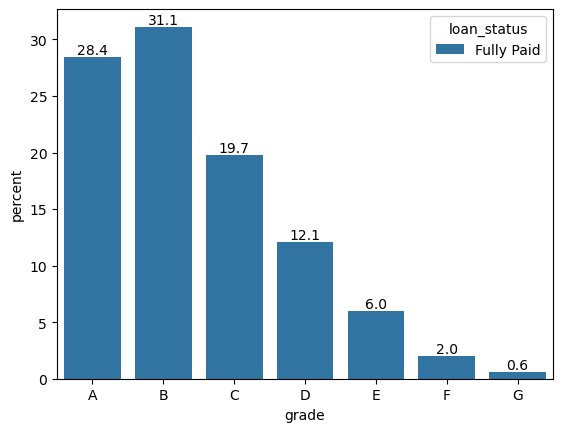

In [69]:
ax=sns.countplot(data=Paid_df,x='grade',hue='loan_status', stat='percent', order=['A','B','C','D','E','F','G'])
ax.bar_label(ax.containers[0],fmt='%.1f')

# Loan grade B & A are having high chance of being paid Fully

[Text(0, 0, '25.8'),
 Text(0, 0, '30.3'),
 Text(0, 0, '20.3'),
 Text(0, 0, '13.2'),
 Text(0, 0, '7.0'),
 Text(0, 0, '2.6'),
 Text(0, 0, '0.8')]

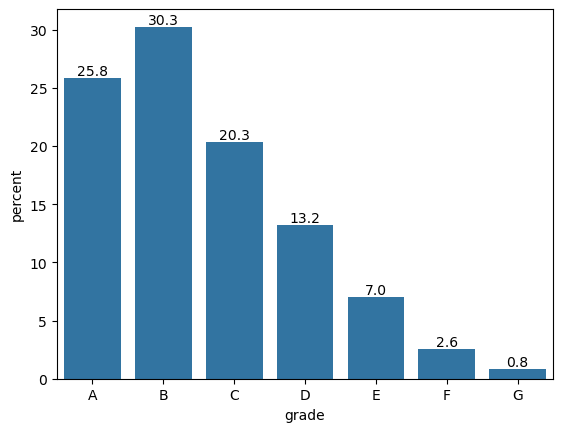

In [70]:
ax=sns.countplot(data=df2, x='grade', stat='percent', order=['A','B','C','D','E','F','G'])
ax.bar_label(ax.containers[0],fmt='%.1f')

#### 7.5)Percent of loan as per purpose

[Text(0, 0, '2.9'),
 Text(0, 0, '8.4'),
 Text(0, 0, '11.0'),
 Text(0, 0, '49.8'),
 Text(0, 0, '3.9'),
 Text(0, 0, '9.5'),
 Text(0, 0, '6.1'),
 Text(0, 0, '1.5'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.9'),
 Text(0, 0, '1.7'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.9')]

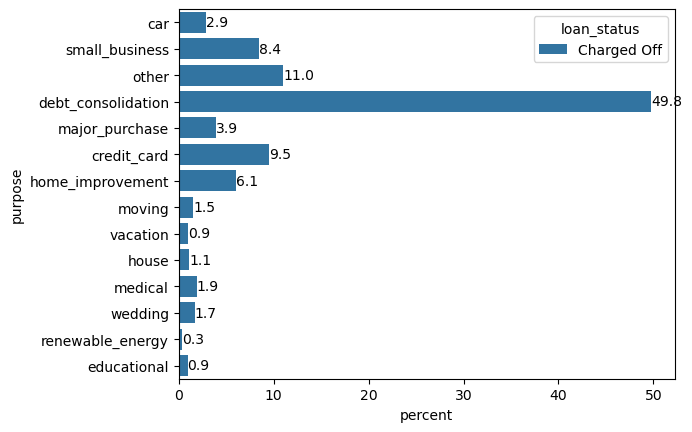

In [71]:
ax=sns.countplot(data=Char_df, y='purpose', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0],fmt='%.1f')

# most of loan given to debt_consolidation & other purpose is being charged off

[Text(0, 0, '13.6'),
 Text(0, 0, '3.8'),
 Text(0, 0, '9.6'),
 Text(0, 0, '2.6'),
 Text(0, 0, '46.7'),
 Text(0, 0, '4.1'),
 Text(0, 0, '7.7'),
 Text(0, 0, '5.9'),
 Text(0, 0, '1.7'),
 Text(0, 0, '1.5'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.9'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.8')]

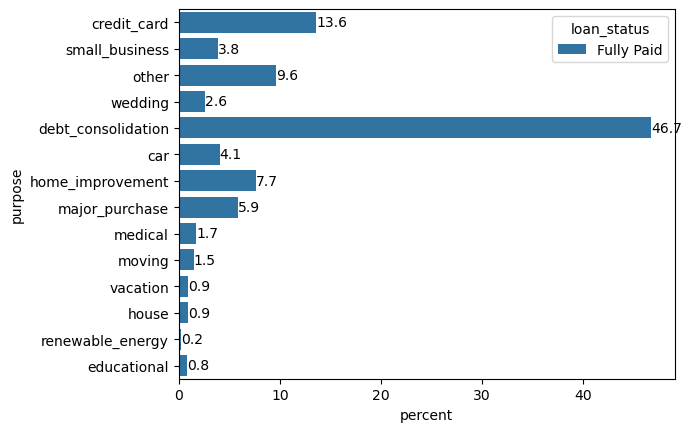

In [72]:
ax=sns.countplot(data=Paid_df, y='purpose', stat='percent', hue='loan_status')
ax.bar_label(ax.containers[0],fmt='%.1f')

# most of loan given to debt_consolidation & credit card is being fully paid

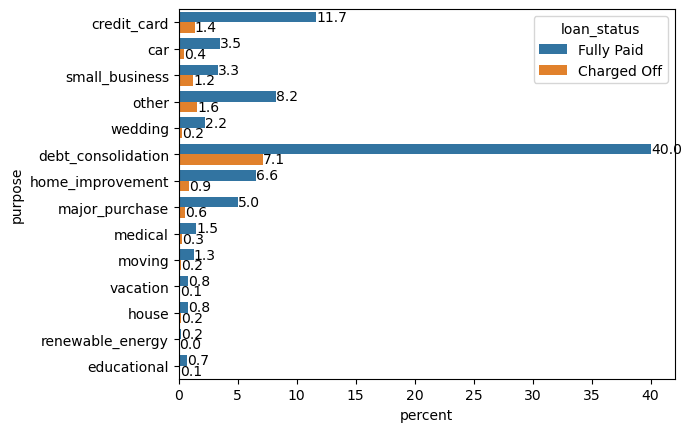

In [73]:
ax=sns.countplot(data=df2, y='purpose', stat='percent', hue='loan_status')
for i in range(2):
    ax.bar_label(ax.containers[i],fmt='%.1f')

# most of loan given to debt_consolidation & credit card is being fully paid

(array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08]),
 [Text(0.0, 0, '0.00'),
  Text(25000000.0, 0, '0.25'),
  Text(50000000.0, 0, '0.50'),
  Text(75000000.0, 0, '0.75'),
  Text(100000000.0, 0, '1.00'),
  Text(125000000.0, 0, '1.25'),
  Text(150000000.0, 0, '1.50'),
  Text(175000000.0, 0, '1.75'),
  Text(200000000.0, 0, '2.00')])

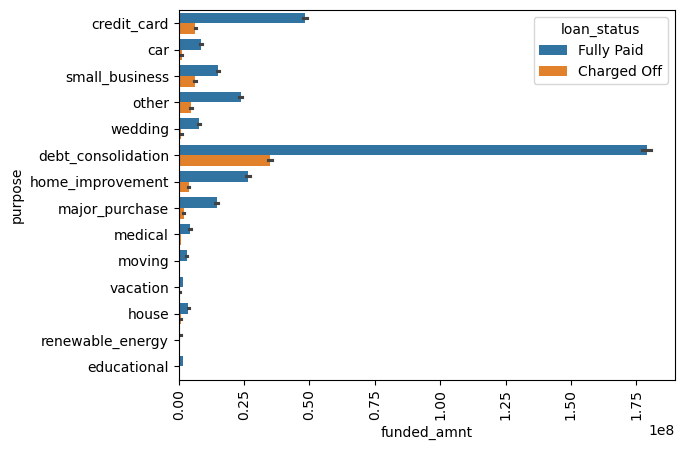

In [74]:
sns.barplot(data=df2, y='purpose', x='funded_amnt', hue='loan_status', estimator='sum')
plt.xticks(rotation=90)

# loan amount given for debt consolidation is high, followed by credit card

#### 7.6) Percnet of loan per employment length

[Text(0, 0, '20.0'),
 Text(0, 0, '10.5'),
 Text(0, 0, '10.4'),
 Text(0, 0, '8.5'),
 Text(0, 0, '8.6'),
 Text(0, 0, '5.7'),
 Text(0, 0, '4.9'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.0'),
 Text(0, 0, '24.7')]

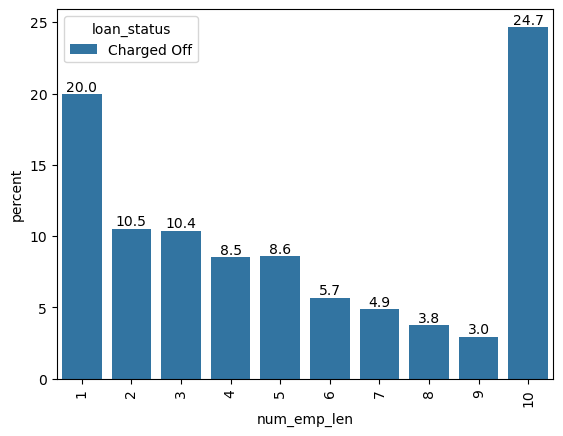

In [75]:
ax=sns.countplot(data=Char_df, x='num_emp_len', hue='loan_status', stat='percent')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],fmt='%.1f')

# loan given to 10+ years experince customer is charged off the most

[Text(0, 0, '20.2'),
 Text(0, 0, '11.6'),
 Text(0, 0, '10.8'),
 Text(0, 0, '9.0'),
 Text(0, 0, '8.6'),
 Text(0, 0, '5.8'),
 Text(0, 0, '4.5'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.3'),
 Text(0, 0, '22.4')]

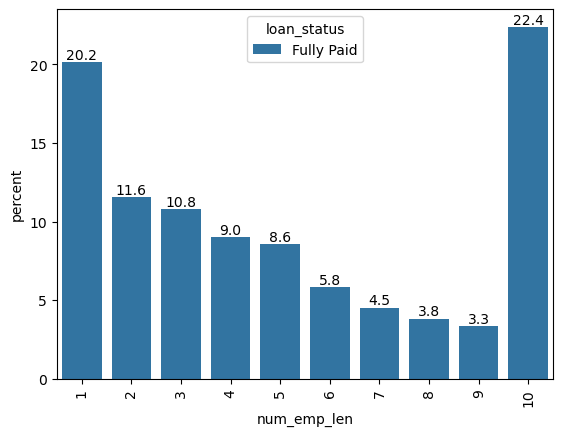

In [76]:
ax=sns.countplot(data=Paid_df, x='num_emp_len', hue='loan_status', stat='percent')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0],fmt='%.1f')

# loan given to 10+ years experince customer is paid fully

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

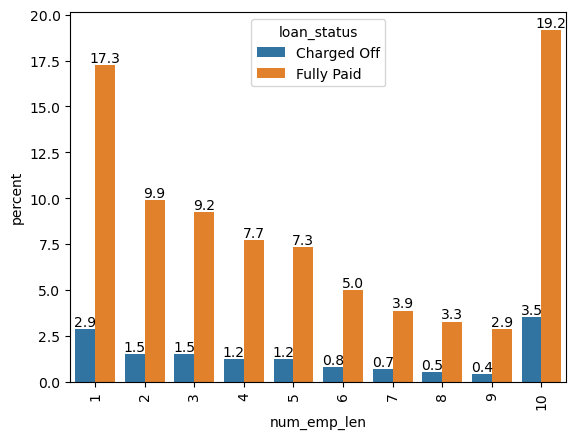

In [77]:
ax=sns.countplot(data=df2, x='num_emp_len', hue='loan_status', stat='percent')
for i in range(2):
    ax.bar_label(ax.containers[i],fmt='%.1f')

plt.xticks(rotation=90)

#### 7.7) Income vs Loan Stauts

<Axes: xlabel='loan_status', ylabel='annual_inc'>

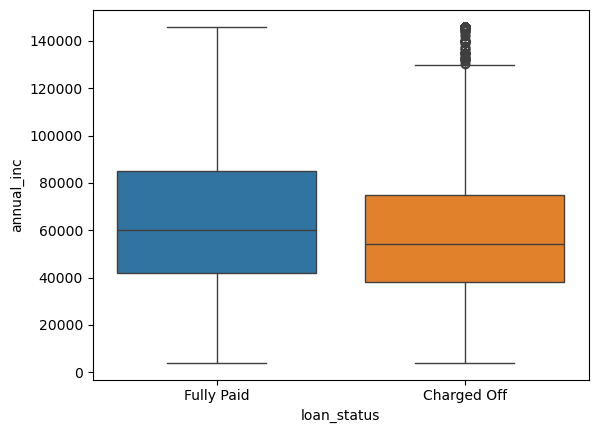

In [78]:
sns.boxplot(data=df2, x='loan_status', y='annual_inc', hue='loan_status')

# Annual income for charged off loan is low when compared to fully paid loan

#### 7.8) Intrest rate vs Loan Stauts

<Axes: ylabel='int_rate'>

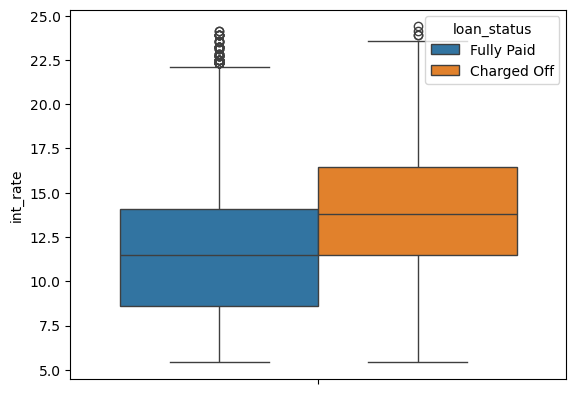

In [79]:
sns.boxplot(data=df2, y='int_rate', hue='loan_status')

# intrest rate is high for charged off loans when compared to fully paid loan

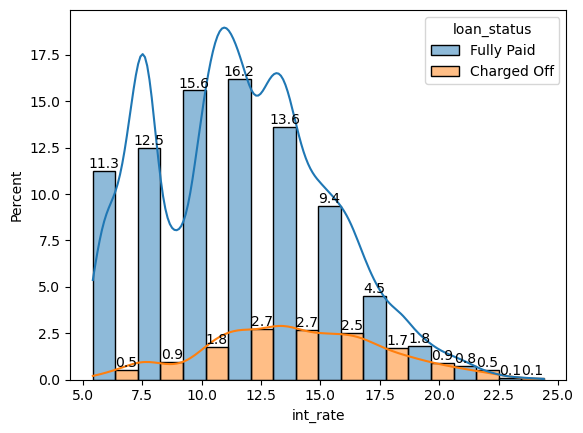

In [80]:
ax=sns.histplot(data=df2, x='int_rate', stat='percent', hue='loan_status', bins=10, kde='True', multiple='dodge')
for i in range(2):
    ax.bar_label(ax.containers[i], fmt='%.1f')

# Fully paid loans have low rate of intrest
# Charged off loans have high rate of intrest

#### 7.8) Term vs Loan Stauts

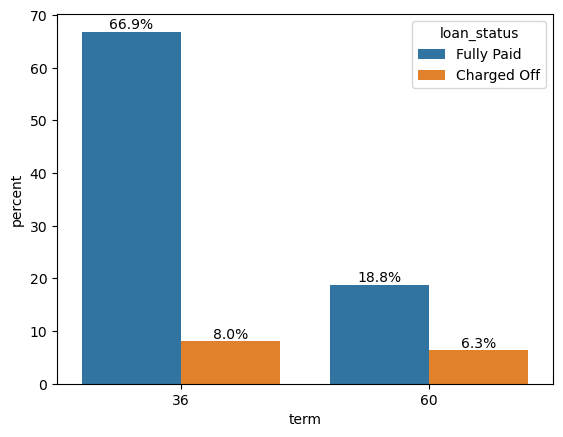

In [81]:
ax=sns.countplot(data=df2, x='term', stat='percent', hue='loan_status')
for i in range(2):
    ax.bar_label(ax.containers[i],fmt='{:.1f}%')

# The loan given for 36 months has better chance of fully paid status (67% of the total loan given for short time is fully paid)

## 8) Multivariate Analysis

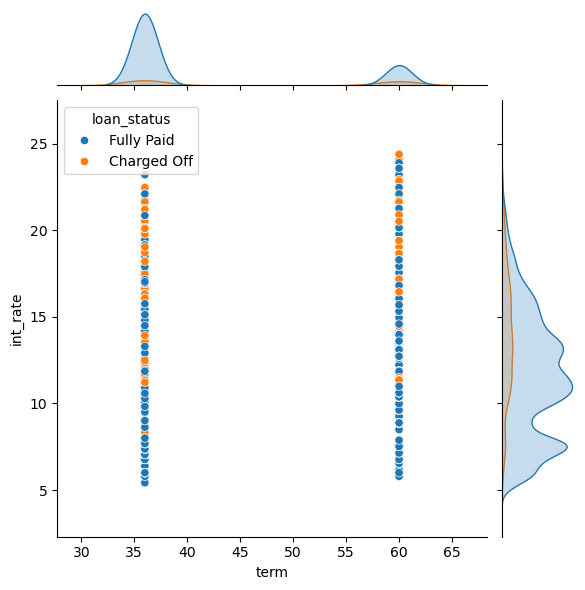

In [82]:
sns.jointplot(data=df2, x='term', y='int_rate', hue='loan_status')

# Most of the Fully paid loans are given for a term of 36 months

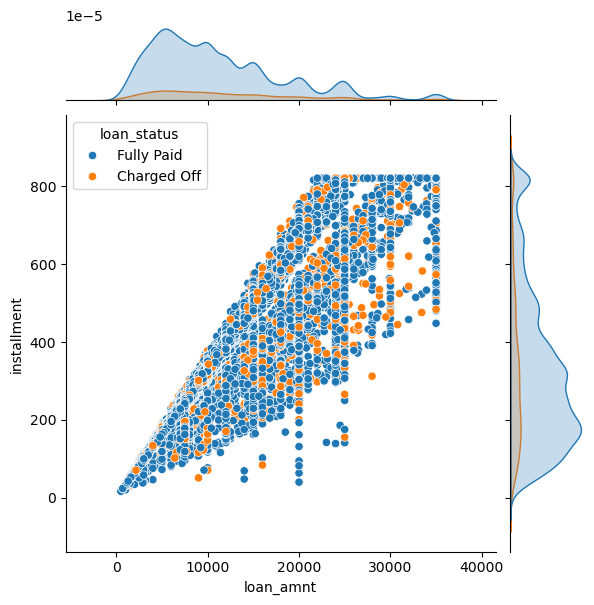

In [83]:
sns.jointplot(data=df2, x='loan_amnt', y='installment', hue='loan_status')

# As the loan amount is increasing the installment is also increasing

<Axes: xlabel='grade', ylabel='loan_amnt'>

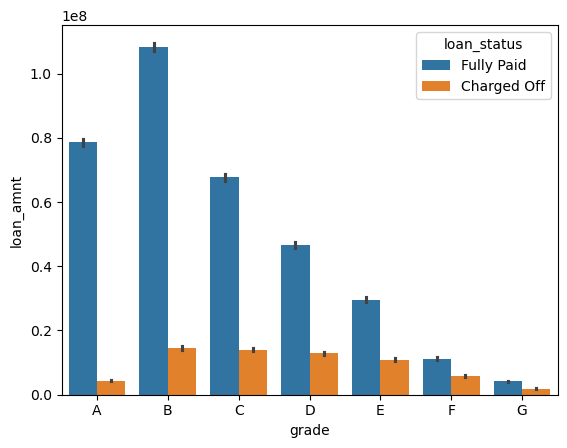

In [84]:
sns.barplot(data=df2, x='grade', y='loan_amnt', hue='loan_status', estimator='sum', order=['A','B','C','D','E','F','G'])

# heighest loan amount is given under group B followed by A

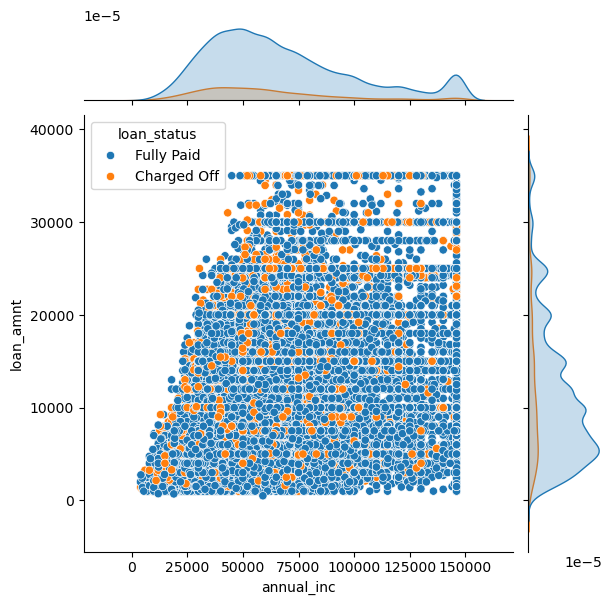

In [85]:
sns.jointplot(data=df2, x='annual_inc', y='loan_amnt', hue='loan_status')

# As the annual income is increasing the loan amount is increasing
# The charged off rate high, when annual income between 25k to 75k

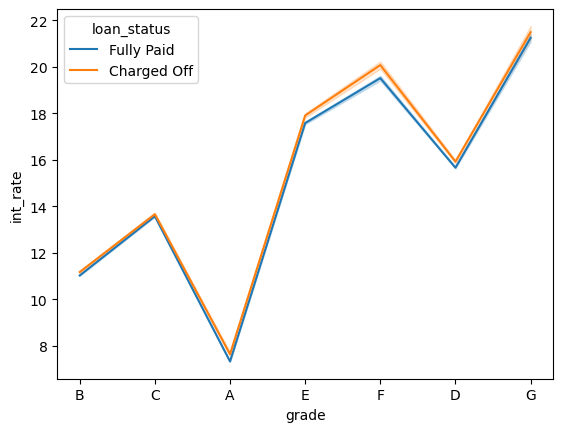

In [86]:
ax=sns.lineplot(data=df2, x='grade', y='int_rate', hue='loan_status', estimator='mean')

# As the grade is increasing form A to G the rate of intrest is also incresing
# mean rate of intrest for both charged off & fully paid loan is same

In [87]:
col=['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'num_emp_len', 'pub_rec_bankruptcies', 'Charged']

<Axes: >

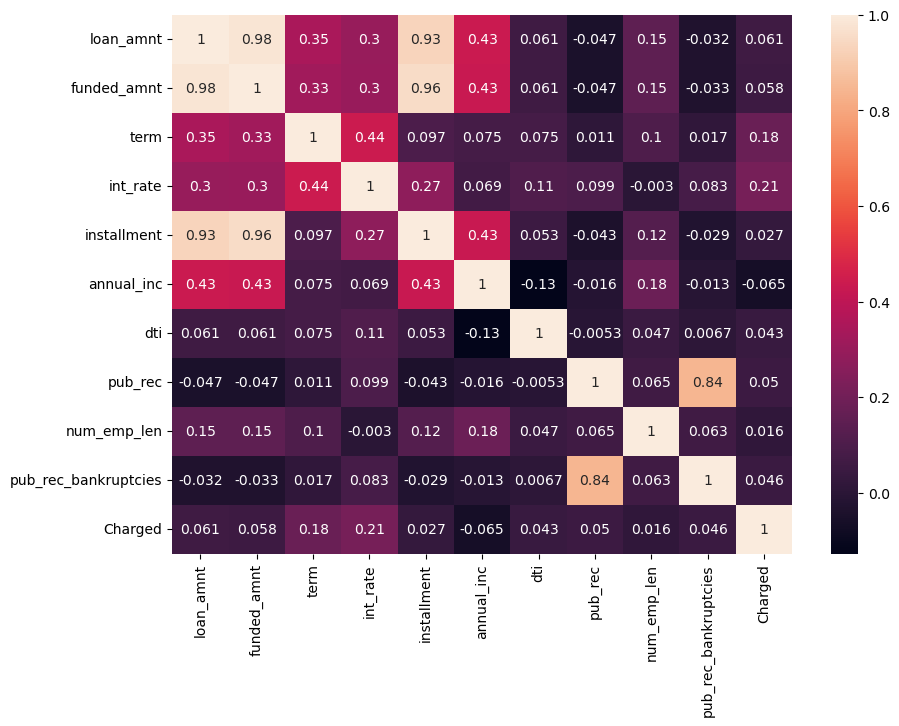

In [88]:
plt.figure(figsize=(10, 7))
sns.heatmap(df2[col].corr(),annot=True)

In [89]:
co_mat=df2[col].corr()['Charged']
co_mat.sort_values(ascending=False)

Charged                 1.000000
int_rate                0.214772
term                    0.178445
loan_amnt               0.060773
funded_amnt             0.057563
pub_rec                 0.049963
pub_rec_bankruptcies    0.045625
dti                     0.042570
installment             0.027164
num_emp_len             0.016036
annual_inc             -0.065247
Name: Charged, dtype: float64

## We can conclude that loan status Charged-off has corelation as follows:
#### Strongly positive corelation - int_rate > term
#### Medium positive corelation - loan_amnt > funded_amnt > pub_rec > pub_rec_bankruptcies > dti > installment > num_emp_len
#### Medium negative corelation - annual_inc